In [ ]:
%%html
<style>
table {display: inline-block}
td {text-align:left}
.consoleMachineFont {color:blue;font-family:Courier}
.consoleUserFont {font-family:Courier}
</style>

# Object-Oriented Programming (part 1/2)
## Python Programming for Engineers
### Tel-Aviv University / 0509-1820 / Fall 2025-2026

## Agenda: Object-Oriented Programming (OOP)
- Tuple comparison
- Building classes
    - Date (partially self-learning)
    -  Event
    -  Calendar
-  `sort` functionality (self-learning)

### Tuples comparison


#### Tuples and lists are compared lexicographically

In [ ]:
print((7,3,1) > (1,3,7))
print((3,1,7) > (7,1,3))

In [ ]:
print((7,3,5) > (7,4,2))

### Objective: represent dates as a Python objects
- A date contains year, month day
- A date object can be queried and manipulated (e.g., `set_day(13)`)

### Solution 1: We can use a `list`
- `date[0]` would hold the day
  `date[1]` would hold the month
  `date[2]` would hold the year

```python
dt = [13,7,2137]
```

#### Problems
- Hard to remember/explain which index represent each component
- Confusing and hard to debug    

### Solution 2: We can use a `dict` (dictionary)
- `date['day']` would hold the day
  `date['month']` would hold the month
  `date['year']` would hold the year

```python
dt = {'year':2137, 'day':13, 'month':7}
```

#### Problems
- No way to guarantee that the date is valid
- Function are not aware the the object (or context) from which they got executed (i.e. using dot notation. e.g.,  using `dt.set_day(13)` instead of `set_day(dt,13)`)

### Solution 3: Class

```python
class <classname>:
	statement_1
	.
	.
	statement_n
```
- The methods of a class get the instance as the first parameter – self
- The method __init__ is called upon object construction (if available)

### The concept of classes

#### Objects are natural to us: everything in one place
- Hold data (in most cases)
- May be manipulated
- Can provide services/behaviours of object **instances** or object **type** (i.e. the class)

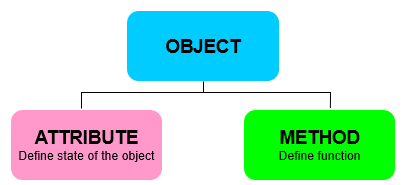


## Date class

- Every date has day, month and year (maintained in different fields)
    - a month between 1 and 12
    - a day between 1 and 30 (let’s keep it simple…)

In [ ]:
class Date:
    def __init__(self, day, month, year):
        self.day = day
        self.month = month
        self.year = year

In [ ]:
d= Date(13,7,2137)
print(d.day)
print(d.month)
print(d.year)

#### <span style='color:red'>Date hasn't been validated yet<span>

### Date - with validation

In [ ]:
class Date:
    def __init__(self, day, month, year):
        self.day = day
        self.month = month
        self.year = year
        #### New code here! ####
        if not self.validate(): # 'self' keyword with dot notation
             print('Invalid date')
        ########################

    #### New method here! ####
    def validate(self): # 'self' as an argument
        return 1 <= self.month <= 12 and 1 <= self.day <= 30

    #########################

In [ ]:
print(Date(13,7,2021))

#### <span style='color:purple'>(1): What will be printed?</span>

#### What would happened if invalid values are given?

In [ ]:
invalid_date=Date(7,13,2137)
print(invalid_date)

#### Invalid dates are still created!

### So far

- All the instances of our “Date” class hold a day, a month and a year attributes
- We "cannot" create invalid dates

### Next

- Date comparison:
```python
def later_than(self, other):
    '''True if self is later than other; False otherwise'''

```
- Increment days
```python
def increment_days(self, days):
    ''' Increment the date by # of days specified in days.
        Note: this method does not have a return statement!
        What does it actually return?'''

 ``` 

#### We need to define how to compare Dates

### Date - with comparison

In [ ]:
class Date:
    def __init__(self, day, month, year):
        self.day = day
        self.month = month
        self.year = year
        if not self.validate(): # 'self' keyword with dot notation
            print('Invalid date')

    def validate(self): # 'self' as an argument
        if 1 <= self.month <= 12 and 1 <= self.day <= 30:
            return True
        else:
            return False

    #### New method here! ####
    def later_than(self, other):
        first = (self.year, self.month, self.day)
        second = (other.year, other.month, other.day)
        return first > second
    ##########################

In [ ]:
d1 = Date(3,1,2137)
d2 = Date(1,3,2137)
print(d1.later_than(d2))
print(d2.later_than(d1))

### Date - with incrementation

In [ ]:
class Date:
    def __init__(self, day, month, year):
        self.day = day
        self.month = month
        self.year = year
        if not self.validate(): # 'self' keyword with dot notation
            print('Invalid date')

    def validate(self): # 'self' as an argument
        if 1 <= self.month <= 12 and 1 <= self.day <= 30:
            return True
        else:
            return False


    def later_than(self, other):
        first = (self.year, self.month, self.day)
        second = (other.year, other.month, other.day)
        return first > second


    #### New method here! ####
    def increment_days(self, days):
        self.day += days
        while self.day > 30: #days are illegal
            self.day -= 30   #keep it simple
            self.month += 1
            if self.month > 12:
                self.month = 1
                self.year += 1
    ##########################

#### <span style='color:purple'>(2): What will be printed?</span>

In [ ]:
d1 = Date(13,7,2137)
d1.increment_days(800)
print(d1.day, d1.month, d1.year)

## Adding time (self-learning)

#### What do we need to change?
- Initialization of Date class
- Validation (check that hours and minutes are legal)
- Increment minutes (or hours)

In [ ]:
class Date:

    def __init__(self, day, month, year, \
               hour=0, minute=0):
        self.day = day
        self.month = month
        self.year = year
        self.hour = hour
        self.minute = minute
        if not self.validate():
            print('Invalid date')


    def validate(self):
        if  1 <= self.month <= 12 and \
        1 <= self.day <= 30 and \
        0 <= self.hour <= 23 and \
        0 <= self.minute <= 59:
            return True
        else:
            return False


    def later_than(self, other):
        first = (self.year, self.month, self.day, \
                 self.hour, self.minute)
        second = (other.year, other.month, other.day, \
                 other.hour, other.minute)
        return first > second


    def increment_hours(self, hours):
        self.hour += hours
        if self.hour > 23: #hours are illegal
            self.increment_days(self.hour // 24)
            self.hour = self.hour % 24


    def increment_minutes(self, minutes):
        self.minute += minutes
        if self.minute > 59: #minutes are illegal
            self.increment_hours(self.minute // 60)
            self.minute = self.minute % 60


## Calendar (+events)

###  Calendar
- Events (a list of sorted events)
- Add event (with conflict detection)
- Find an empty slot

#### How does event look like?
- Event
    - Title
    - Start time
    - End time
    - Is conflicting?

## Classes' blueprint

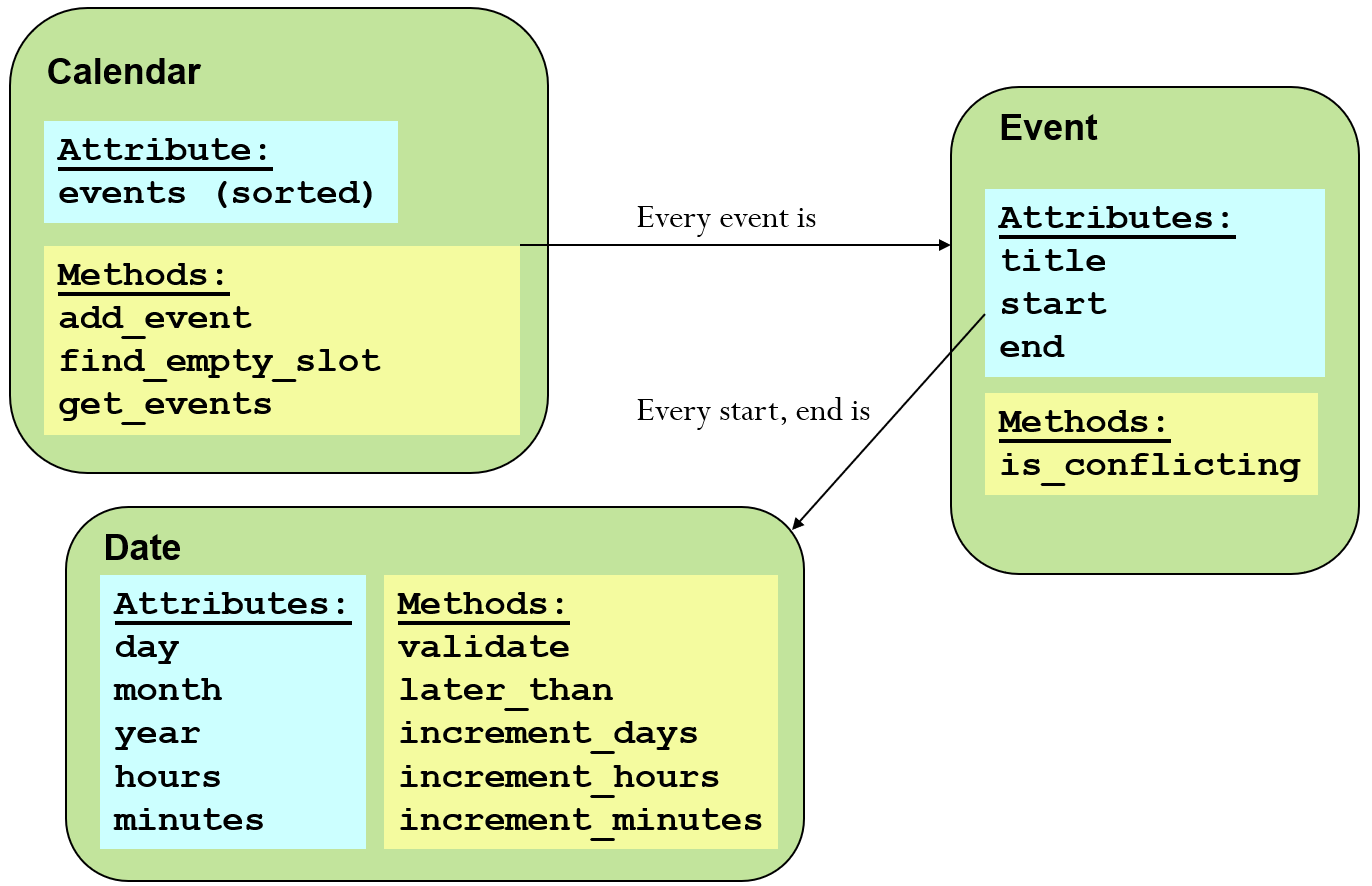

### Event constructor

In [ ]:
class Event:

    def __init__(self, title, start, end):
        self.title = title
        self.start = start
        self.end = end
        if start.later_than(end):
            print("invalid dates: end time earlier than start time")
            self.start = end
            self.end = start

    def is_conflicting(self, other):
        return not(other.start.later_than(self.end) or
                   self.start.later_than(other.end))


d1=Date(10,10,2020)
d2=Date(20,10,2020)
print(Event("t", d1, d2))

### `Calendar` implementation

In [ ]:
class Calendar:
    def __init__(self):
        self.events = [] #events must be sorted by start time

    def add_event(self, new_event):
        for event in self.events:
            if new_event.is_conflicting(event):
                print('Conflict detected')
                return
        self.events.append(new_event)
        self.events.sort(key=get_start_date)

#### <span style='color:purple'>(3): What will be printed?</span>

In [ ]:
c = Calendar()
e = Event('lecture', Date(13,7,2137,13,30), Date(13,7,2137,15,0))
c.add_event(e)
e = Event('lunch', Date(13,7,2137,12,0), Date(13,7,2137,13,0))
c.add_event(e)

print(c.events[-1].start.hour) 

### We need to implement the function `get_start_date`

In [ ]:
def get_start_date(event):
    return  (event.start.year, event.start.month,
            event.start.day, event.start.hour,
            event.start.minute)

In [ ]:
e = Event('dinner', Date(13,7,2137,19,30), Date(13,7,2137,20,30))
get_start_date(e)

### Alternatively, use lambda expression

In [ ]:
class Calendar:
    def __init__(self):
        self.events = [] #events must be sorted by start time

    def add_event(self, new_event):
        for event in self.events:
            if new_event.is_conflicting(event):
                print('Conflict detected')
                return
        self.events.append(new_event)
        self.events.sort(key=lambda a: (a.start.year, a.start.month,
            a.start.day, a.start.hour,
            a.start.minute))

In [ ]:
c = Calendar()
e = Event('lecture', Date(13,7,2137,13,30), Date(13,7,2137,15,0))
c.add_event(e)
e = Event('lunch', Date(13,7,2137,12,0), Date(13,7,2137,13,0))
c.add_event(e)

print(c.events[0].start.hour)
print(c.events[1].start.hour)

## Self Learning

### `sort` functionality

### Reverse the sorting

In [ ]:
numbers = [3, 1, 7, 0]
numbers.sort()
print(numbers)
numbers.sort(reverse=True)
print(numbers)

### Sort with respect to something

#### Sorting accroding to length

In [ ]:
names = ['Rick', 'Morty', 'Jerry', 'Beth', 'Summer']
names.sort()
print(names)

names.sort(key=len)
print(names)

#### Sorting list of tuples by 2nd item in the tuple

1. Make a function for extracting the property from any given item. In our case, the second item of the tuple

In [ ]:
def extract_second(tup):
    return tup[1]

2. Pass the function to sort as the key argument

In [ ]:
lst = [(1,3,7), (7,1,3), (3,7,1)]
lst.sort(key = extract_second)
print(lst)

#### Or, do everything in a one-liner using lambda

In [ ]:
lst = [(1,3,7), (7,1,3), (3,7,1)]
lst.sort(key = lambda a: a[1])
print(lst)

## `find_empty_slot` implementation
implement the method `find_empty_slot(self, title, minutes)` that gets a title for the event and the duration in minutes.
The method returns an Event object with the title and duration, placed in an available time within the calendar.

Note: The available time must be the **earliest available time** occuring after the first calendar event.

In [ ]:
# Solution
class Calendar:
    def __init__(self):
        self.events = [] #events must be sorted by start time
    def add_event(self, new_event):
        for event in self.events:
            if new_event.is_conflicting(event):
                print('Conflict detected')
                return
        self.events.append(new_event)
        self.events.sort(key=get_start_date)
    ##### New method #####
    def find_empty_slot(self, title, minutes):
        for i in range(len(self.events)-1):
            cpy = self.events[i].end
            window_start = Date(cpy.day,cpy.month,cpy.year,
                            cpy.hour,cpy.minute)
            window_end = Date(cpy.day,cpy.month,cpy.year,
                             cpy.hour,cpy.minute)
            window_end.increment_minutes(minutes)

            possible_window = Event(title, window_start, window_end)

            if i == len(self.events)-1 or \
            not self.events[i+1].is_conflicting(possible_window):
                return possible_window
    ######################

#### <span style='color:purple'>(4): What will be printed?</span>

In [ ]:
c = Calendar()
e = Event('lecture', Date(13,7,2137,13,30), Date(13,7,2137,15,0))
c.add_event(e)
e = Event('lunch', Date(13,7,2137,12,0), Date(13,7,2137,13,0))
c.add_event(e)
e = c.find_empty_slot('45min', 45)
print(get_start_date(e))

## Playing cards
In this exercise, you will implement a class that represents a single playing card from a standard deck.
Define a class named `PlayingCard` with the following:

Each card should have the following attributes:
- rank – an integer representing the card’s rank (e.g., 1-13)
- suit – a string representing the card’s suit ("hearts", "spades", "clubs", "diamonds")

The class should have the following methods:
- Constructor - initialize both fields (rank, suit). If input was invalid, print "Invalid input".
- `to_str(self)` - Returns a readable string such as "1 of hearts". If the card is Jack, Queen or King, it will print "Jack of hearts" etc.
- `same_suit(self, other)` - Returns `True` if both cards have the same suit, and `False` otherwise.
- `beats(self, other)` - Returns `True` if the current card is stronger than other, and `False` otherwise.  
You can assume the following ranking order (from weakest to strongest):
2 < 3 < 4 < 5 < 6 < 7 < 8 < 9 < 10 < J < Q < K < A (For simplicity, ignore the suit when comparing strength.)

In [1]:
# Solution
class PlayingCard:
    def __init__(self, rank, suit):
        suits = ["hearts", "spades", "clubs", "diamonds"]
        if (type(rank) is not int) or (rank > 13) or (rank < 1) or (suit not in suits):
            print ("Invalid input")
        self.rank = rank
        self.suit = suit
    
    def to_str(self):
        royals = {11: "Jack", 12:"Queen", 13:"King"}
        return f"{royals.get(self.rank, self.rank)} of {self.suit}"
    
    def same_suit(self, other):
        return self.suit == other.suit
    
    def beats(self, other):
        return self.rank > other.rank

In [5]:
c1 = PlayingCard(2, "hearts")
c2 = PlayingCard(10, "hearts")
c3 = PlayingCard(13, "spades")

print(c1.to_str())
print(c3.to_str())
print(c1.same_suit(c2))   
print(c1.same_suit(c3))   
print(c2.beats(c3))       
print(c3.beats(c2))       

2 of hearts
King of spades
True
False
False
True
